In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [5]:
data=pd.read_excel('Air bnb 1.xlsx')

In [6]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48869 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48873 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [8]:
data.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [9]:
data.shape

(48895, 16)

In [10]:
data.isnull().sum()

id                                    0
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
data.nunique()

id                                48895
name                              47895
host_id                           37457
host_name                         11451
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.drop(['id','neighbourhood','latitude','longitude','reviews_per_month'],axis=1,inplace=True)

In [14]:
data.isnull().sum()

name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
data.last_review.fillna(0,inplace=True)

In [16]:
data.isnull().sum()

name                              26
host_id                            0
host_name                         22
neighbourhood_group                0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<Axes: >

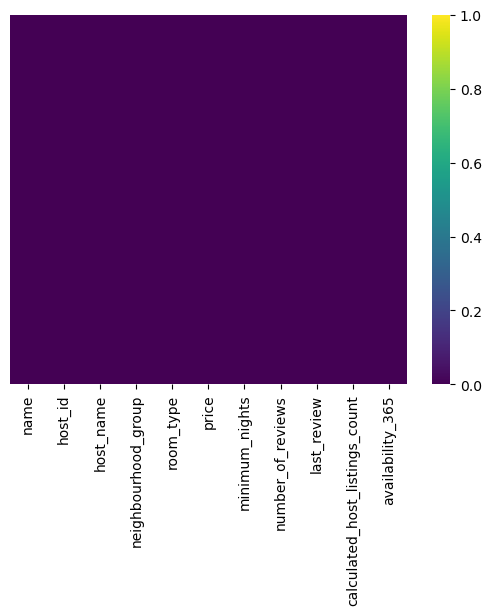

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

# Location wise In demand Hotels in NYC

In [18]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [19]:
data.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47895, dtype: int64

In [20]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Most preferred room types

In [21]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [22]:
air_bnb=data.head(500)

In [23]:
air_bnb.neighbourhood_group.value_counts()

Brooklyn         237
Manhattan        229
Queens            22
Bronx              7
Staten Island      5
Name: neighbourhood_group, dtype: int64

Text(0.5, 0, 'City')

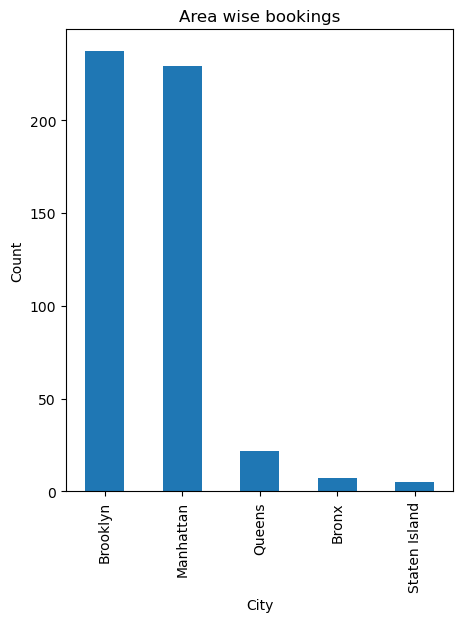

In [24]:
pd.value_counts(air_bnb['neighbourhood_group']).plot(kind="bar", figsize =(5,6))
plt.title('Area wise bookings')
plt.ylabel('Count')
plt.xlabel('City')

Text(0.5, 0, 'Price')

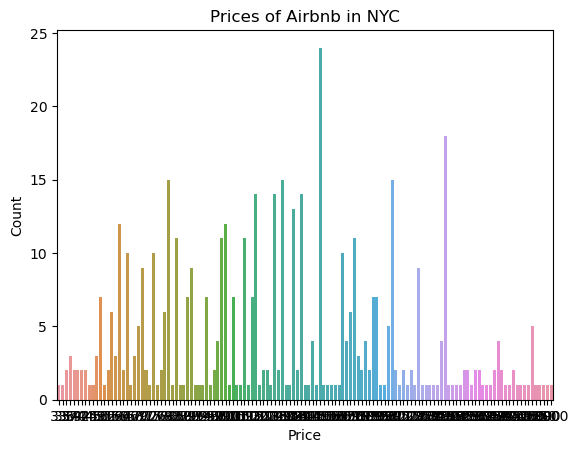

In [25]:
sns.countplot(data=air_bnb,x='price')
plt.title('Prices of Airbnb in NYC')
plt.ylabel('Count')
plt.xlabel('Price')

In [26]:
rooms=data.groupby('room_type')['room_type'].count()

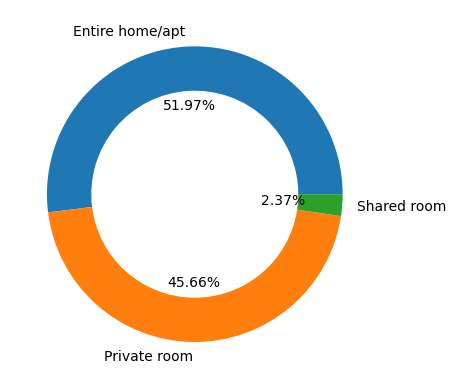

In [27]:
plt.pie(rooms,labels=rooms.index,autopct="%.2f%%",wedgeprops=dict(width=0.3));
plt.show()

In [28]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

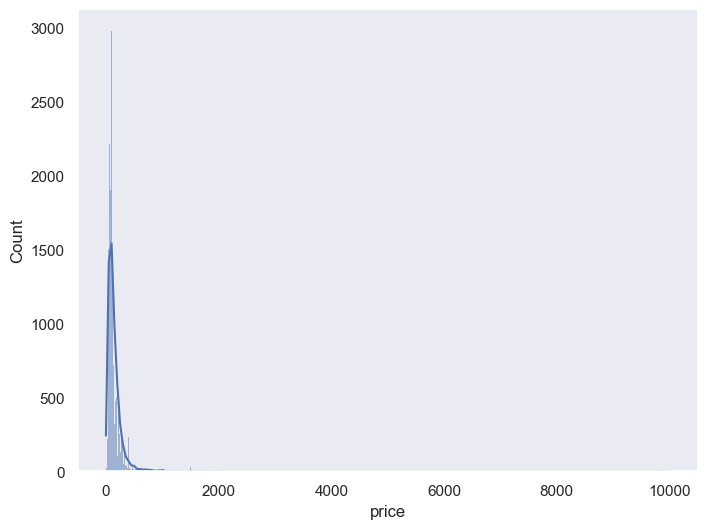

In [53]:
sns.histplot(data.price,kde = True)
sns.set(rc={'figure.figsize':(5,6)})
sns.set_style('dark')

# Top hosts with max listing

In [30]:
top_host=data.host_name.value_counts().head(10)
top_host

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [31]:
data.calculated_host_listings_count

0        6
1        2
2        1
3        1
4        1
        ..
48890    2
48891    2
48892    1
48893    6
48894    1
Name: calculated_host_listings_count, Length: 48895, dtype: int64

In [32]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_name', 'host_name':'P_Count'}, inplace=True)
top_host_df

,Host_name,P_Count
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


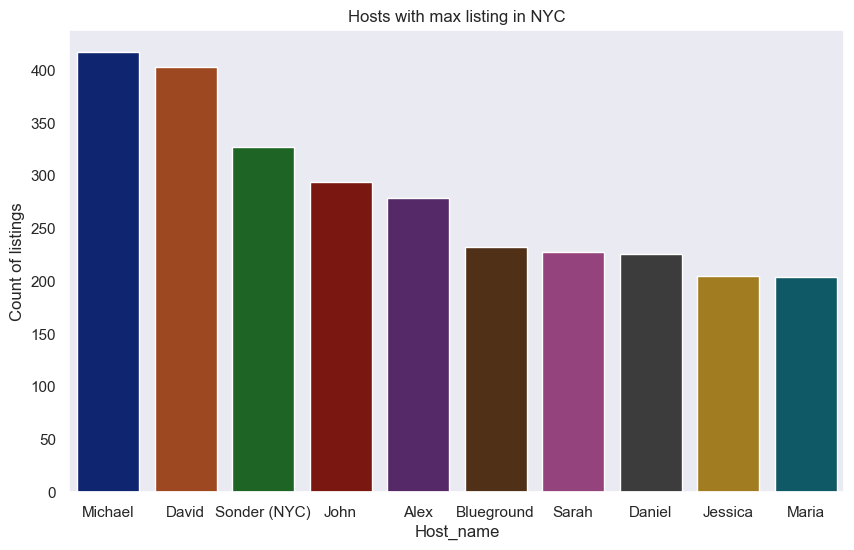

In [33]:
top_listing=sns.barplot(x="Host_name", y="P_Count", data=top_host_df,
                 palette='dark')
top_listing.set_title('Hosts with max listing in NYC')
top_listing.set_ylabel('Count of listings')
top_listing.set_xlabel('Host_name')
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')

# Affordable Airbnb in NYC

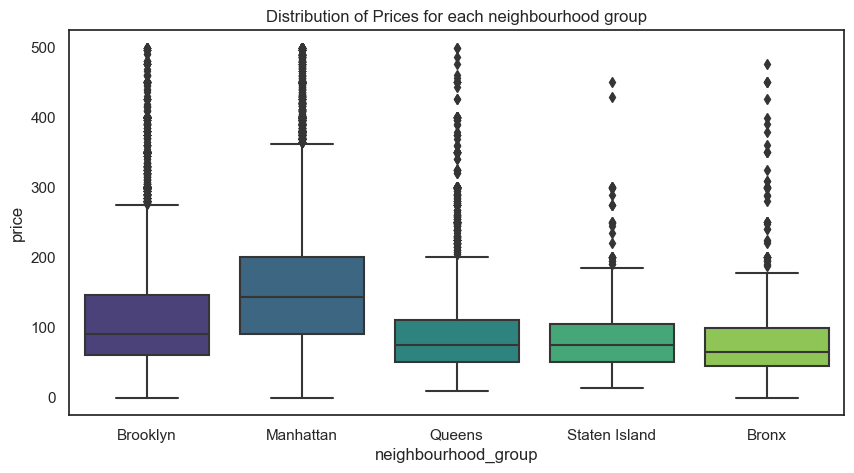

In [34]:
affordable_airbnb=data[data.price<500]
affordable_airbnb=sns.boxplot(data=affordable_airbnb,x='neighbourhood_group',y='price',palette='viridis')
affordable_airbnb.set_title('Distribution of Prices for each neighbourhood group')
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')

# Most Reviewed

In [35]:
data.number_of_reviews.value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

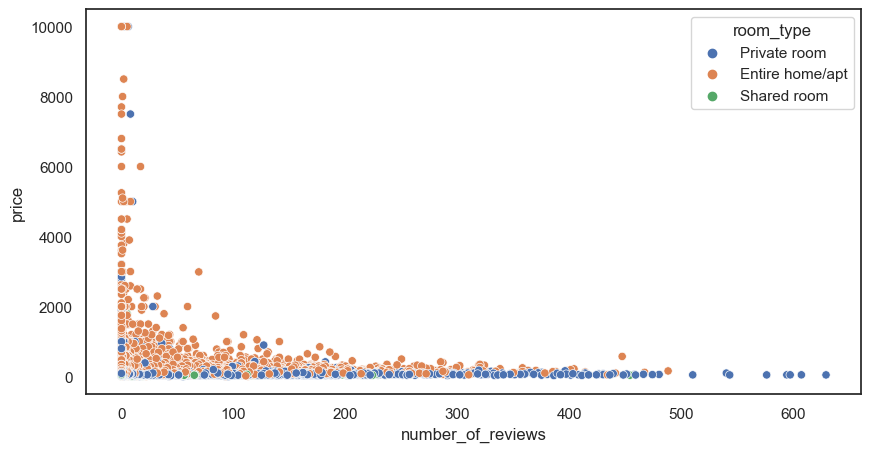

In [38]:
sns.scatterplot(x='number_of_reviews',y='price',data=data,hue='room_type');

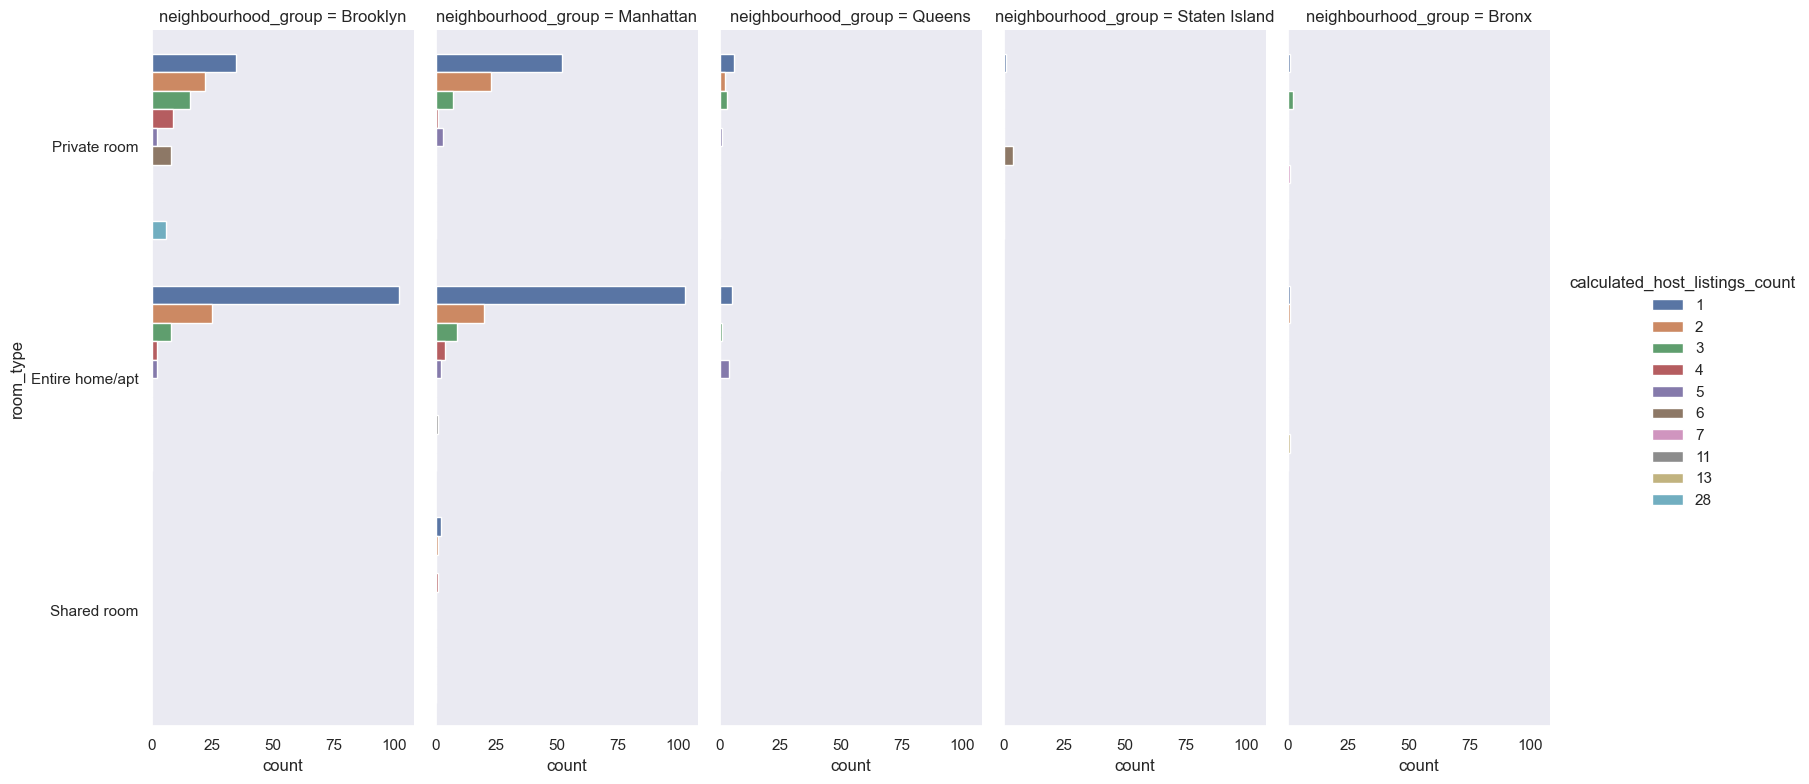

In [60]:
top_2=data.loc[data['room_type'].isin(['Private room','Entire home/apt','Share room'])]
top_2=sns.catplot(y='room_type',hue='calculated_host_listings_count',col='neighbourhood_group',data=air_bnb,kind='count',height=8,aspect=0.4)

In [68]:
n=data.calculated_host_listings_count.tail(100)

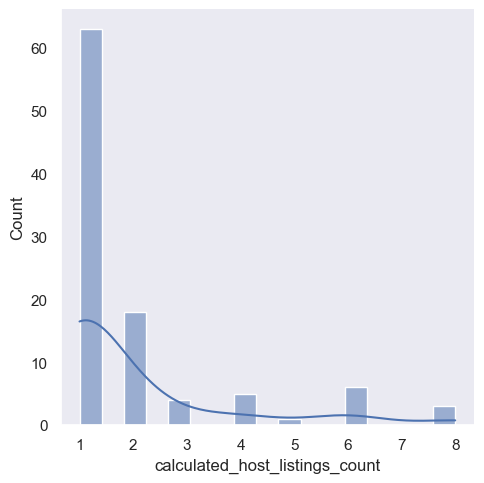

In [75]:
sns.displot(n,kde=True)